# Clustering: KMeans vs. DBCSCAN vs. Agnes (Agglomerative Clustering)

## Project Objective
The goal of this project is to explore and compare different clustering methods: K-means, Hierarchical Clustering, and DBSCAN.

To achieve this, the project follows these steps:

- Understanding Clustering Methods: Reviewing the principles and characteristics of K-means, Hierarchical, and DBSCAN clustering.

- Clustering Implementation: Applying the three clustering algorithms to the dataset and generating meaningful groupings.

- Evaluation and Comparison:  Analyzing and comparing the results obtained from each clustering method.

By the end of the project, we aim to identify which clustering technique provides the most insightful groupings for the given dataset.


## Dataset Description
The dataset used in this project is available at: Machine Failure Prediction Using Sensor Data https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data.

It contains sensor readings collected from various machines, with the goal of predicting potential failures in advance. The dataset includes multiple sensor measurements as well as recorded machine failures.


### Clustering

We begin by importing the necessary libraries and loading the dataset.


This file contains 944 sensor measurements from different machines and includes a label indicating whether a failure is present or not.

Notes:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/ML&DL/

/content/drive/MyDrive/ML&DL


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('data_clustering.csv', sep=',')

In [4]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


#### How many instances does the dataset have?


In [5]:
print(f"It has got {df.shape[0]} instances.")

It has got 944 instances.


#### What is the predominant data type in the dataset?


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


The dataset has 10 columns or numerical variables. All of them take integer values (int64).


#### Are they categorical or numerical variables?

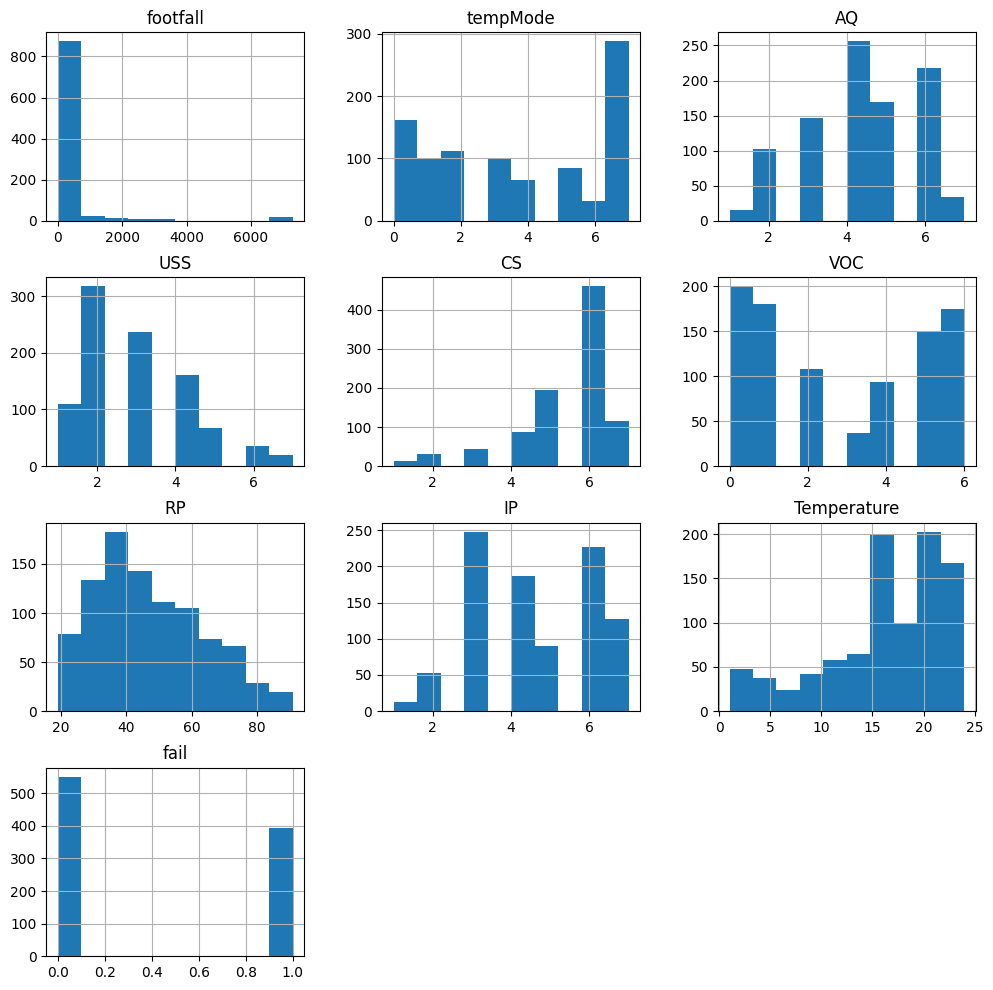

In [7]:
hist = df.hist(figsize=(12,12))
plt.show()

In [8]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


Almost all the variables are categorical (*tempMode*, *AQ*, *USS*, *CS*, *VOC*, *IP*, and *fail*), since they take only a few values; some are directly modes or categories. In addition, the target variable *fail* is binary categorical, as it only admits two values: 0 and 1 (although it will later be removed).

The variables that do not correspond to categories, as they have a considerably large number of values, are *footfall*, *RP*, and *Temperature*, which are numerical.


#### Maxima and minima of RP?

In [9]:
df['RP'].describe()

,RP
count,944.000000
mean,47.043432
std,16.423130
min,19.000000
25%,34.000000
50%,44.000000
75%,58.000000
max,91.000000


The minimum value of RP is 19; the maximum, 91.

#### For clustering algorithms, the dataset cannot have instances with missing data. Does this dataset contain missing data?


In [10]:
df.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


There are no missing values.

#### What about duplicates?

In [11]:
num_duplicates = df.duplicated().sum()
print(f'Duplicated rows: {num_duplicates}')

Duplicated rows: 1


Since there is a duplicated row, we delete it.

---



In [12]:
df.drop_duplicates(inplace=True)

#### Since this is an unsupervised learning project, we drop the _fail_ variable.

In [13]:
df.drop(columns=["fail"], inplace=True)

#### Is it necessary to perform any additional processing on the data?


We start by reviewing the distribution of the data.


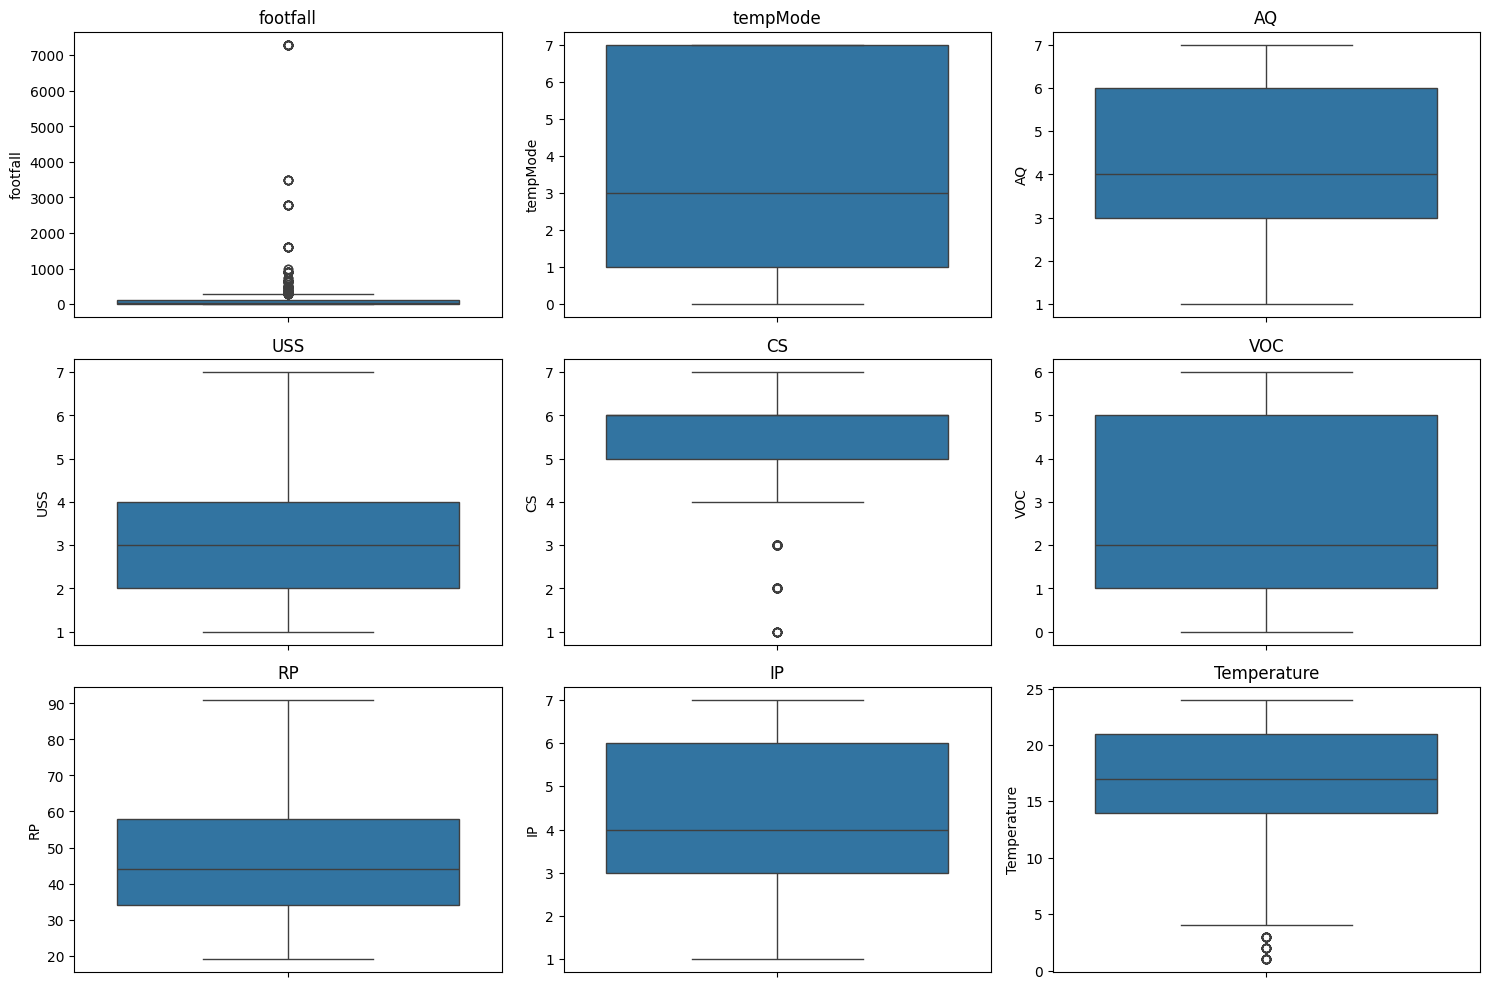

In [14]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

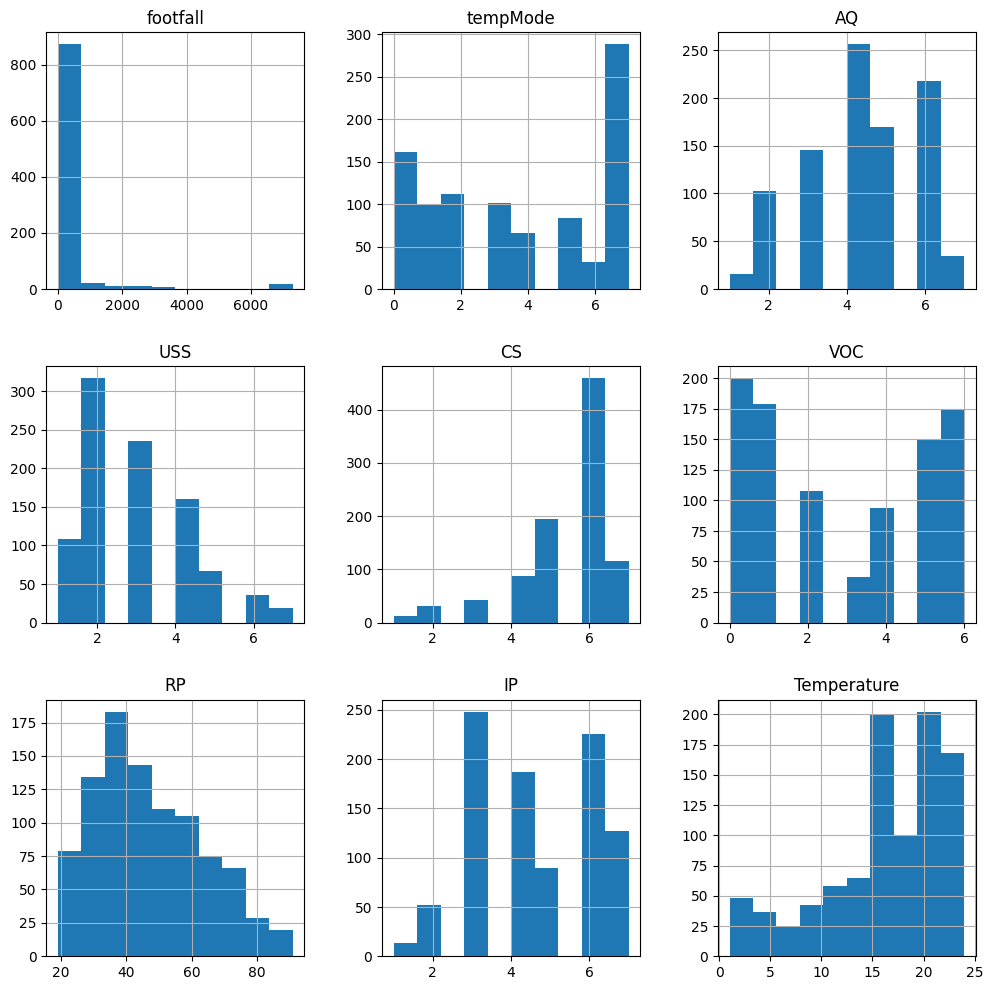

In [15]:
hist = df.hist(figsize=(12,12))
plt.show()

Machine learning algorithms prefer variables to be uniform or normally/Gaussian distributed. First, we will apply a transformation to the *footfall* variable (square root) and *RP* (logarithmic), since these have a long right tail.

Next, we will scale the numerical data, that is, the variables *RP*, *Temperature*, and *footfall*, and we will test two techniques: MinMaxScaler and StandardScaler.


In [16]:
# Load the MinMax and Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

Why two techniques? The truth is that, a priori, we don’t know which one is better. The argument in favor of Min-Max scaling is that it works well when there are no significant outliers (most are removed after applying the transformations) and it is a good technique for scaling when using distance-based methods, such as K-Means.


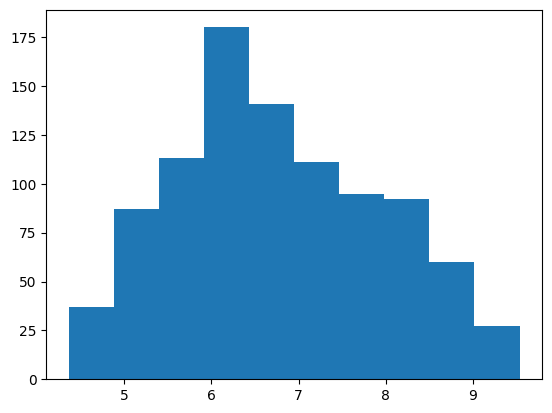

In [17]:
sqrt_transformer = FunctionTransformer(np.sqrt)
sqrt_rp = sqrt_transformer.fit_transform(df[["RP"]])


plt.hist(sqrt_rp.values.flatten())
plt.show()

We now have a Gaussian distribution. This distribution makes clustering algorithms perform much better.


Another variable with a long right tail, which also seems to have anomalous values, is *footfall*. We proceed to apply a logarithmic transformation (specifically, log(x+1)), since the minimum value of *footfall* is 0.


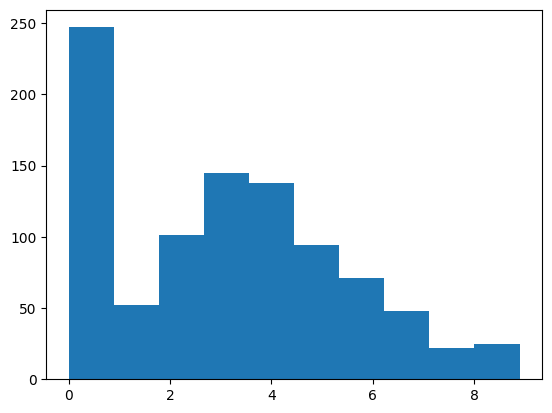

In [18]:
# We define the function that will transform the footfall variable.
def log_plus_one(x):
  return np.log(x+1)

# We save, in case it’s needed, the inverse function of log(x+1) in a function.
def inverse_log_plus_one(x):
  return np.exp(x)-1

log_transformer = FunctionTransformer(log_plus_one, inverse_func=inverse_log_plus_one)
log_footfall = log_transformer.fit_transform(df[["footfall"]])

plt.hist(log_footfall.values.flatten())
plt.show()

In [19]:
# We create a copy of the dataframe before applying any transformations
# to the dataset.
df_transformed = df.copy()

In [20]:
# Apply the functions to the variables
df_transformed['sqrt_RP'] = sqrt_transformer.fit_transform(df[["RP"]])
df_transformed['log_footfall'] = log_transformer.fit_transform(df[["footfall"]])

# We now have the transformed columns in the dataframe df_transformed.
# Next, we keep only these transformed columns, removing the original ones.
df_transformed.drop(columns=["RP", "footfall"], inplace=True)


Now, once some variables have been transformed, we look for outliers.
To do this, we use boxplots and the interquartile range (IQR). Then, we remove all values that fall outside the IQR $\pm 1.5$.

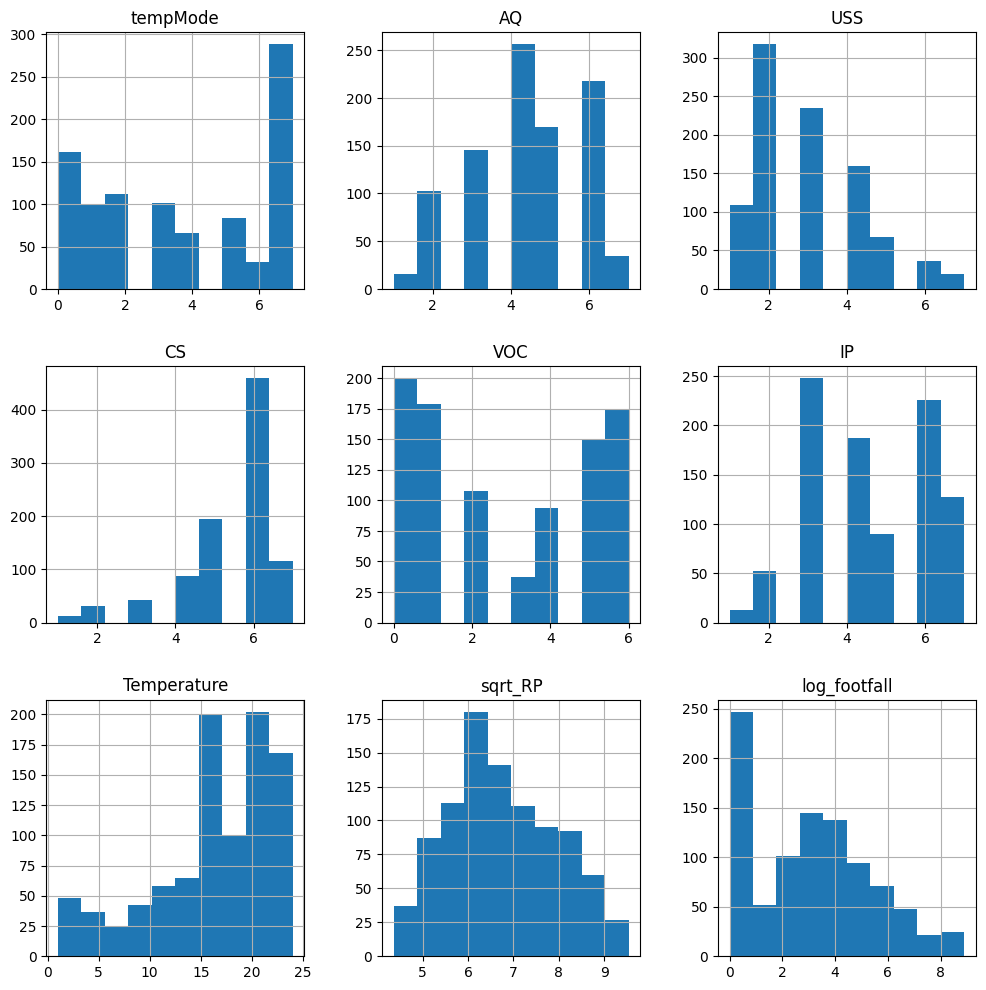

In [21]:
hist = df_transformed.hist(figsize=(12,12))
plt.show()

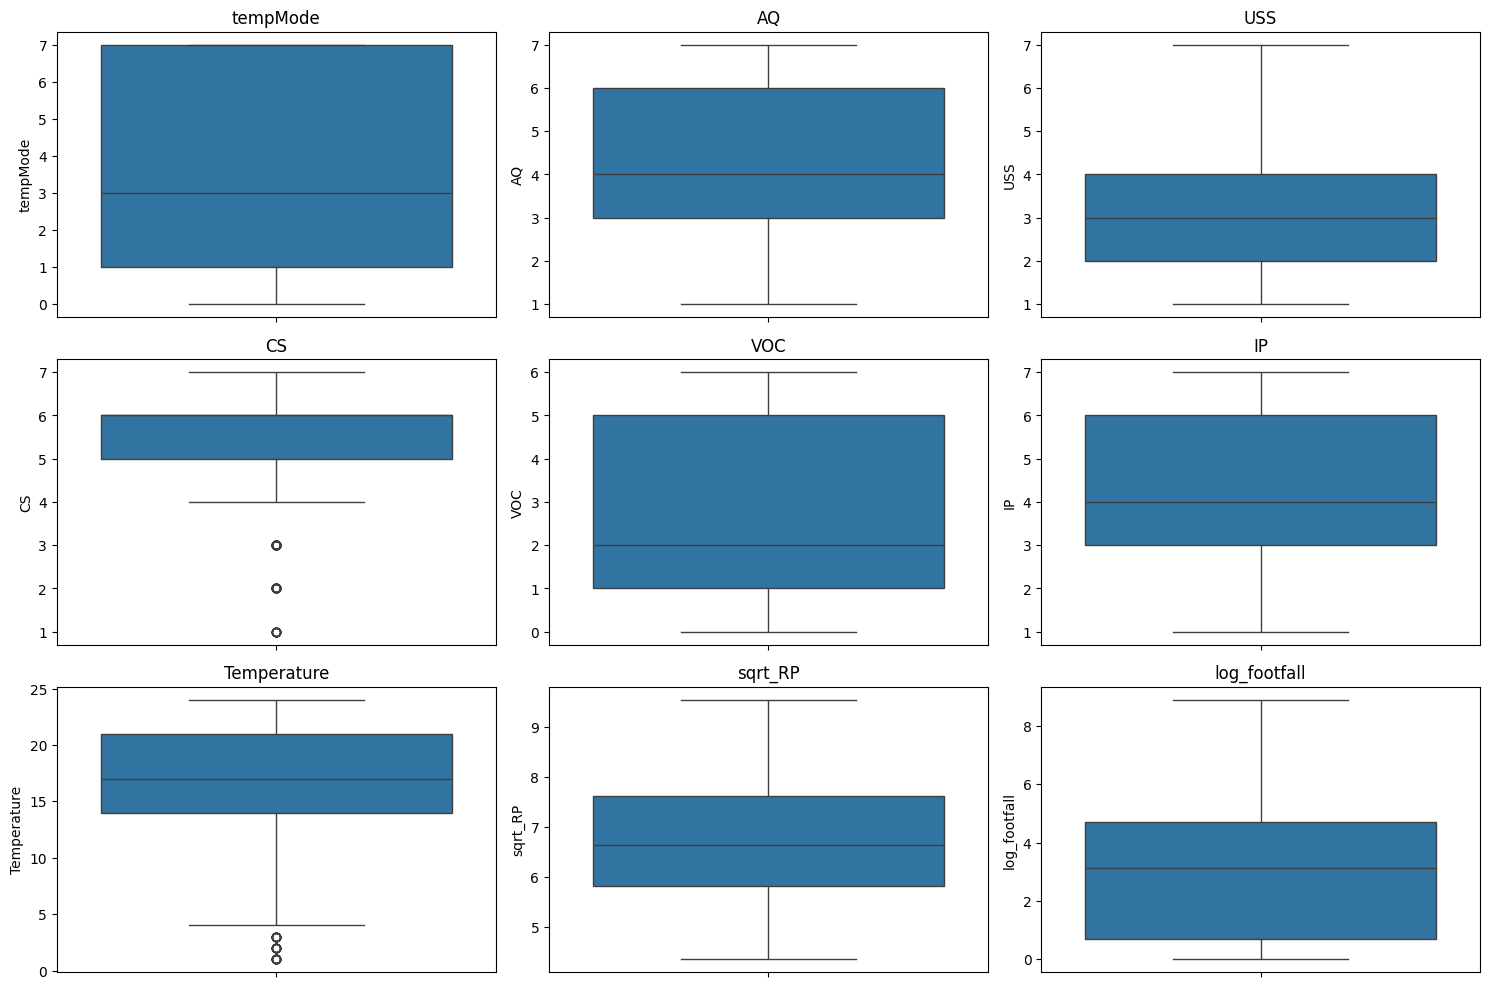

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_transformed.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_transformed[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [23]:
# We compute the RI for each column
Q1 = df_transformed.quantile(0.25)
Q3 = df_transformed.quantile(0.75)
IQR = Q3 - Q1

# Se the maxima and minima for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
df_no_outliers = df_transformed[~((df_transformed < lower_bound) | (df_transformed > upper_bound)).any(axis=1)]

# We check the number of rows before and after removing the outliers
print(f"Number of rows before removing outliers: {df_transformed.shape[0]}")
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")

Number of rows before removing outliers: 943
Number of rows after removing outliers: 816


In [24]:
print(df_no_outliers.head())

    tempMode  AQ  USS  CS  VOC  IP  Temperature   sqrt_RP  log_footfall
49         1   3    4   5    2   6            4  4.690416      0.000000
50         7   5    1   6    5   3            4  8.246211      0.000000
51         2   5    2   6    5   3            4  6.164414      0.000000
52         7   4    3   6    3   2            4  8.306624      3.526361
54         7   2    4   6    0   4            4  9.380832      3.828641


We have removed 127 rows. Now we proceed to standardize the numerical columns.


In [25]:
df_std_scaled = df_no_outliers.copy()
df_minmax_scaled = df_no_outliers.copy()

df_std_scaled[["sqrt_RP", "log_footfall", "Temperature"]] = standard_scaler.fit_transform(
    df_std_scaled[["sqrt_RP", "log_footfall", "Temperature"]]
)

df_minmax_scaled[["sqrt_RP", "log_footfall", "Temperature"]] = minmax_scaler.fit_transform(
    df_minmax_scaled[["sqrt_RP", "log_footfall", "Temperature"]]
)


print(df_std_scaled.head())
print(df_minmax_scaled.head())

    tempMode  AQ  USS  CS  VOC  IP  Temperature   sqrt_RP  log_footfall
49         1   3    4   5    2   6    -2.671518 -1.809442     -1.279758
50         7   5    1   6    5   3    -2.671518  1.242356     -1.279758
51         2   5    2   6    5   3    -2.671518 -0.544368     -1.279758
52         7   4    3   6    3   2    -2.671518  1.294206      0.203999
54         7   2    4   6    0   4    -2.671518  2.216156      0.331187
    tempMode  AQ  USS  CS  VOC  IP  Temperature   sqrt_RP  log_footfall
49         1   3    4   5    2   6          0.0  0.063993      0.000000
50         7   5    1   6    5   3          0.0  0.750375      0.000000
51         2   5    2   6    5   3          0.0  0.348522      0.000000
52         7   4    3   6    3   2          0.0  0.762037      0.396409
54         7   2    4   6    0   4          0.0  0.969393      0.430389


For now, we will use both datasets to compare them with KMeans and see which one gives better results. Then, we will store in the variable `X` the dataframe scaled using the technique that provides the best results.


### Why did we do this?

The distributions of the footfall and RP variables have long right tails. Observing the data distribution, we notice many outliers. By applying a positive linear transformation (logarithmic, and even a square root since all values in the RP variable are positive) to the data, we can bring them closer to a more normal distribution, which improves model performance.

Standardizing a highly skewed variable like footfall does not make the data more symmetric; it only scales them, leaving the underlying distribution asymmetric.

## K-Means

We create 10 KMeans models and train them, using the silhouette score method to determine the optimal number of clusters.


In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to perform KMeans clustering and calculate silhouette scores
def find_optimal_k(data, max_k=10):
  """
    Finds the optimal number of clusters (K) for K-Means clustering using silhouette scores.

    The function iterates over a range of K values from 2 to `max_k`, performs K-Means clustering
    for each K, and calculates the silhouette score to evaluate the clustering quality. The optimal
    K is determined as the one with the highest silhouette score, and a plot of the silhouette
    scores for each K is generated.

    Parameters:
    ----------
    data : array-like, shape (n_samples, n_features)
        The dataset to be clustered, typically scaled, with rows representing samples and columns
        representing features.

    max_k : int, optional (default=10)
        The maximum number of clusters (K) to consider when evaluating the silhouette score.
        The function will compute silhouette scores for values of K ranging from 2 to `max_k`.

    Returns:
    -------
    optimal_k : int
        The number of clusters (K) that yields the highest silhouette score.

    Notes:
    -----
    - The silhouette score measures how well clusters are defined. A higher score indicates that
      clusters are well-separated.
    - A plot of silhouette scores versus K values is displayed to visualize the performance of
      different K values.

    Example:
    --------
    >>> find_optimal_k(data_scaled, max_k=10)
    """

  silhouette_scores = []
  K_values = range(2, max_k + 1)

  # Try different values of K (number of clusters)
  for K in K_values:
      kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
      kmeans.fit(data)
      cluster_labels = kmeans.labels_
      silhouette_avg = silhouette_score(data, cluster_labels)
      silhouette_scores.append(silhouette_avg)

  # Plot silhouette scores for each K value
  plt.figure(figsize=(8, 6))
  plt.plot(K_values, silhouette_scores, marker='o')
  plt.title('Silhouette Score for different K values')
  plt.xlabel('Number of clusters (K)')
  plt.ylabel('Silhouette Score')
  plt.grid(True)
  plt.show()

  # Find the optimal K (highest silhouette score)
  optimal_k = K_values[np.argmax(silhouette_scores)]
  print(f"Optimal number of clusters: {optimal_k}")

  return optimal_k

Silhouette coefficient results for the standardized dataframe


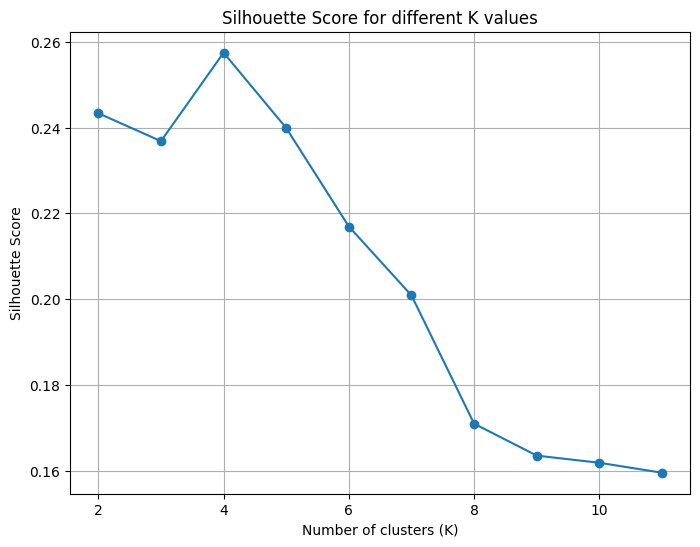

Optimal number of clusters: 4
Silhouette coefficient results for the min-max scaled dataframe


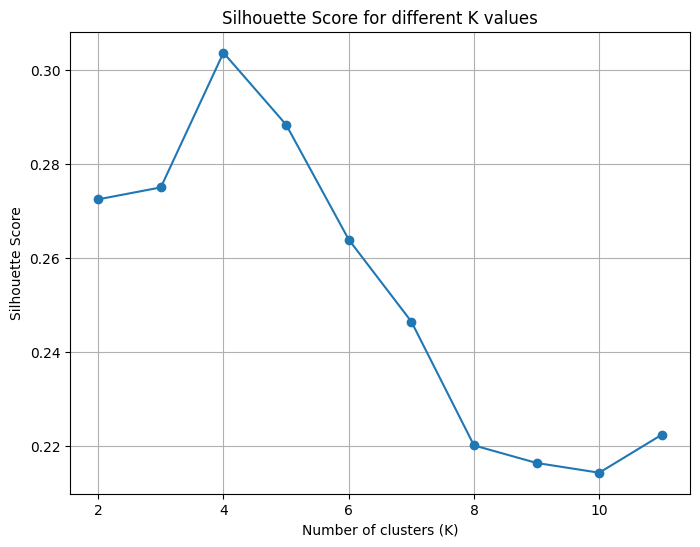

Optimal number of clusters: 4


4

In [27]:
# Find the optimal K based on silhouette score
print("Silhouette coefficient results for the standardized dataframe")
find_optimal_k(df_std_scaled, max_k=11)

print("Silhouette coefficient results for the min-max scaled dataframe")
find_optimal_k(df_minmax_scaled, max_k=11)

We can see that we achieve better silhouette scores using the MinMaxScaler technique. In both cases, however, the optimal number of clusters is 4.


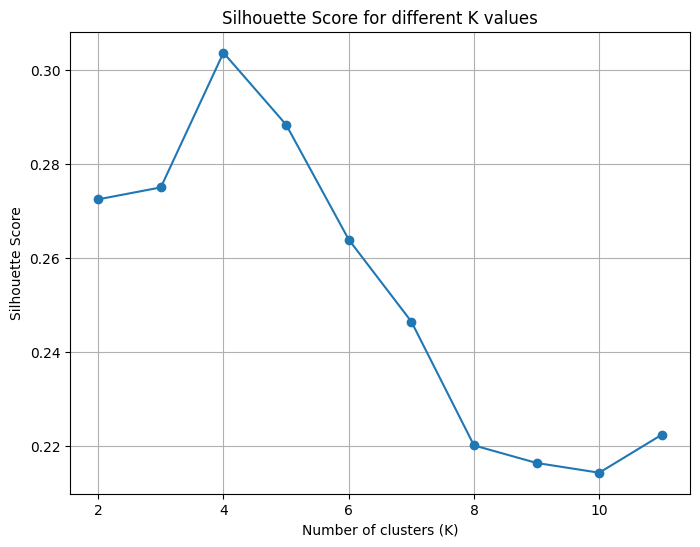

Optimal number of clusters: 4


In [28]:
X = df_minmax_scaled
optimal_k = find_optimal_k(X, max_k=11)

We check the optimal number of clusters using other methods: the elbow method and the Calinski-Harabasz index.


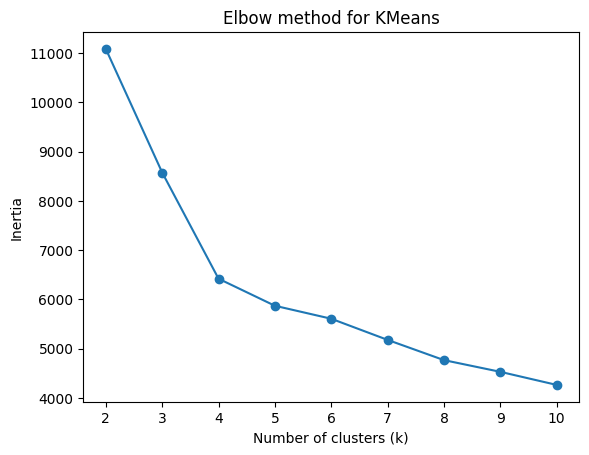

Para k = 2, la inercia es: 11080.715756058544
Para k = 3, la inercia es: 8573.665842684395
Para k = 4, la inercia es: 6419.796708662797
Para k = 5, la inercia es: 5871.126346177155
Para k = 6, la inercia es: 5607.685093296917
Para k = 7, la inercia es: 5178.808679096822
Para k = 8, la inercia es: 4768.466735795285
Para k = 9, la inercia es: 4531.001895906613
Para k = 10, la inercia es: 4265.707903445078


In [29]:
# List to store the KMeans models
kmeans_models = []

# List to store the inertia of every model
inertias = []

# Range of k (number of clusters) to test
k_range = range(2, 11)

# Iterate over the range of k and create/train the KMeans models.
for k in k_range:
    # Creates a KMeans model for the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Train the model with the scaled data
    kmeans.fit(X)

    # Store the trained model in the list of models
    kmeans_models.append(kmeans)

    # Calculate the inertia (sum of squared distances of samples to their nearest centroid).
    inertias.append(kmeans.inertia_)

# Elbow method to determine the optimal number of clusters
# Plots inertia vs. the number of clusters

plt.plot(k_range, inertias, marker='o')
plt.title('Elbow method for KMeans')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Print the inertia for each k
for k, inertia in zip(k_range, inertias):
    print(f"Para k = {k}, la inercia es: {inertia}")

In [30]:
from sklearn.metrics import calinski_harabasz_score

# Range of k (number of clusters) to test
k_range = range(2, 11) # Start at 2, since we need at least 2 clusters

# Dictionary to store the Calinski-Harabasz scores
calinski_harabasz_scores = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_

    calinski_harabasz_scores[k] = calinski_harabasz_score(X, labels)

for k, score in calinski_harabasz_scores.items():
    print(f"k = {k}: {score}")

# Find the optimal k (the one with the highest Calinski-Harabasz score)
k_optimal_calinski = max(calinski_harabasz_scores, key=calinski_harabasz_scores.get)
print(f"\n Optimal k according to Calinski-Harabasz: {k_optimal_calinski}")

k = 2: 344.8781039657126
k = 3: 353.2618175232544
k = 4: 394.4451528148012
k = 5: 341.99218463888474
k = 6: 308.7060017596148
k = 7: 289.5046746953469
k = 8: 273.9112853001367
k = 9: 255.55304327024763
k = 10: 244.11239449791103

 Optimal k according to Calinski-Harabasz: 4


Both the elbow method and the Calinski-Harabasz index indicate that the best K-Means model has 4 clusters.


Now it’s time to interpret what KMeans has done. Recall that the goal of KMeans is to find patterns in the data.

The first step is to create a plot to visualize the clusters it has formed based on the variables used to generate them.


In [31]:
# Save the model with the optimal number of clusters
kmeans_best = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_best.fit(df_minmax_scaled)
cluster_labels = kmeans_best.labels_

In [32]:
import plotly.express as px

clusters = pd.DataFrame(X,columns=X.columns)
clusters['label'] = kmeans_best.labels_
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=600)
fig4.show()

Let’s highlight the main differences between the clusters:

- Clusters 1 (red) and 3 (purple) have much higher values for *VOC* and *AQ* than clusters 0 (blue) and 2 (green). Between the pairs {0, 2} and {1, 3}, the distances are not significant.
- Regarding the *tempMode* variable, clusters 1 and 2 have very high values, while clusters 0 and 3 are considerably lower. Again, differences within each pair are minimal.
- For *logfootfall*, differences among all clusters are minimal (even on a logarithmic scale). The same applies to *IP* and *CS*.
- However, for the transformed variable *sqrt\_RP*, there is a significant difference between clusters {1, 2} and {0, 3}. Internal differences within each pair are again minimal.

Here we have commented on the differences and similarities among clusters generated by KMeans. We will further deepen the comparative analysis.


## DBSCAN

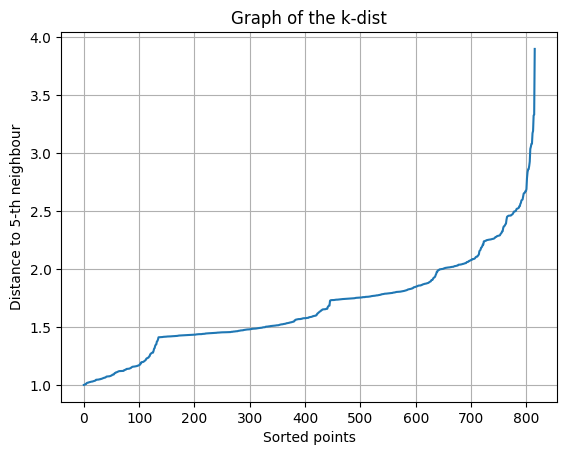

eps': 0.7000000000000001, 'min_samples': 4, score=0.0016907173464000172
eps': 1.6, 'min_samples': 8, score=0.10191496298426912
eps': 1.7000000000000002, 'min_samples': 8, score=0.11832949149901112
eps': 1.8000000000000003, 'min_samples': 12, score=0.15371694298361338
eps': 1.9000000000000001, 'min_samples': 14, score=0.17458097397377514
eps': 2.0, 'min_samples': 14, score=0.1790821869710309
eps': 2.1, 'min_samples': 20, score=0.2003386070758608
Best hyperparameters: {'eps': np.float64(2.1), 'min_samples': 20}


In [33]:
#### Perform a search for the algorithm's best hyperparameters.
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort the distances to the k-th neighbour
k_distances = np.sort(distances[:, -1])

plt.plot(k_distances)
plt.xlabel("Sorted points")
plt.ylabel(f"Distance to {min_samples}-th neighbour")
plt.title("Graph of the k-dist")
plt.grid()
plt.show()

best_score = -1
best_params = {}

for eps in np.arange(0.1, 5.0, 0.1):
    for min_samples in range(4, 21, 2):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)

        # Avoid calculating the silhouette score if there is only one cluster
        # or if all points are labeled as noise (-1).
        if len(set(labels)) > 1 and len(set(labels)) != 1 + (1 if -1 in labels else 0):
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                print(f"eps': {eps}, 'min_samples': {min_samples}, score={score}")
                best_params = {'eps': eps, 'min_samples': min_samples}

print("Best hyperparameters:", best_params)

In [34]:
#### Train the DBSCAN algorithm using the found hyperparameters
dbscan_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels_dbscan = dbscan_best.fit_predict(X)

In [35]:
#### We choose two variables to visualize the clusters
X.describe()

,tempMode,AQ,USS,CS,VOC,IP,Temperature,sqrt_RP,log_footfall
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,3.704657,4.333333,2.730392,5.707108,2.991422,4.718137,0.667586,0.470956,0.341907
std,2.660740,1.455825,1.237793,0.814741,2.287587,1.594920,0.250043,0.225049,0.267330
min,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,5.000000,1.000000,3.000000,0.550000,0.300585,0.077919
50%,3.000000,4.000000,2.000000,6.000000,3.000000,5.000000,0.700000,0.453491,0.352470
75%,7.000000,6.000000,3.000000,6.000000,5.000000,6.000000,0.850000,0.628680,0.518800
max,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,1.000000,1.000000,1.000000


In [36]:
# We add the labels to the original DataFrame.
X['Cluster_DBSCAN'] = labels_dbscan
print(X.describe())

         tempMode          AQ         USS          CS         VOC          IP  \
count  816.000000  816.000000  816.000000  816.000000  816.000000  816.000000   
mean     3.704657    4.333333    2.730392    5.707108    2.991422    4.718137   
std      2.660740    1.455825    1.237793    0.814741    2.287587    1.594920   
min      0.000000    1.000000    1.000000    4.000000    0.000000    1.000000   
25%      1.000000    3.000000    2.000000    5.000000    1.000000    3.000000   
50%      3.000000    4.000000    2.000000    6.000000    3.000000    5.000000   
75%      7.000000    6.000000    3.000000    6.000000    5.000000    6.000000   
max      7.000000    7.000000    7.000000    7.000000    6.000000    7.000000   

       Temperature     sqrt_RP  log_footfall  Cluster_DBSCAN  
count   816.000000  816.000000    816.000000      816.000000  
mean      0.667586    0.470956      0.341907        0.247549  
std       0.250043    0.225049      0.267330        0.705800  
min       0.000000

The variables considered are:

- **Temperature**: has a relatively low standard deviation (0.25) compared to its range (0 to 1), suggesting that the values are somewhat clustered. This could help distinguish clusters based on different temperature ranges.

- **log\_footfall**: has a moderate standard deviation (0.267) and a range of 0 to 1.


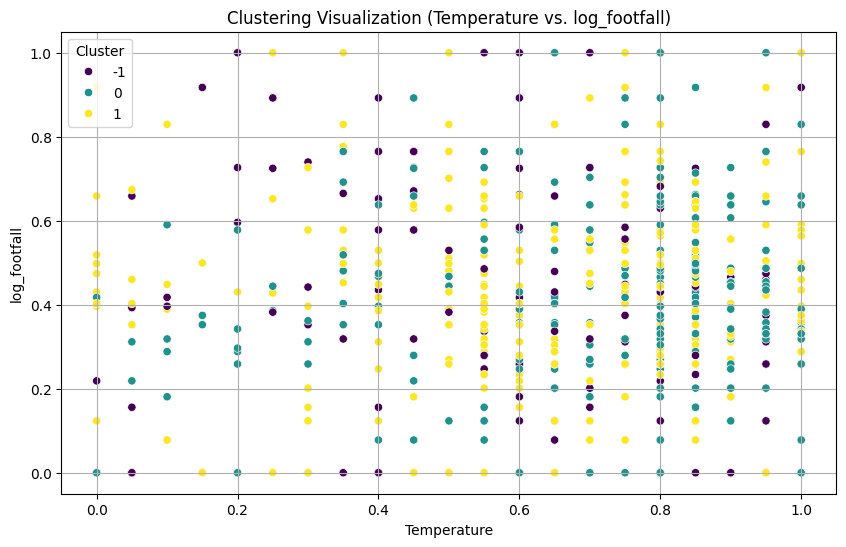

In [37]:
import seaborn as sns

# Create a DataFrame with the two selected variables and the cluster labels
df_visualisation = pd.DataFrame({
    'Temperature': X['Temperature'],
    'log_footfall': X['log_footfall'],
    'Cluster': labels_dbscan
})

# Visualize the clusters using a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='log_footfall', hue='Cluster', data=df_visualisation, palette='viridis')
plt.title('Clustering Visualization (Temperature vs. log_footfall)')
plt.xlabel('Temperature')
plt.ylabel('log_footfall')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The DBSCAN algorithm with the chosen hyperparameters yields two clusters (0 and 1), while the purple points (-1) indicate values that do not fit into any cluster (anomalies). In reality, this visualization does not provide any clear insights (nor have I been able to achieve this with other visualizations). We will continue using DBSCAN in the comparison of K-Means, DBSCAN, and Agglomerative Clustering models.


## Dendrograma

In [38]:
#### Apply AgglomerativeClustering algorithm
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# Agglomerative clustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    #plt.axline(XXXX, color = 'r', linestyle = '--')
    plt.title("Hierarchical clustering")
    plt.ylabel("Distance")
    plt.xlabel("Instances")
    plt.show()

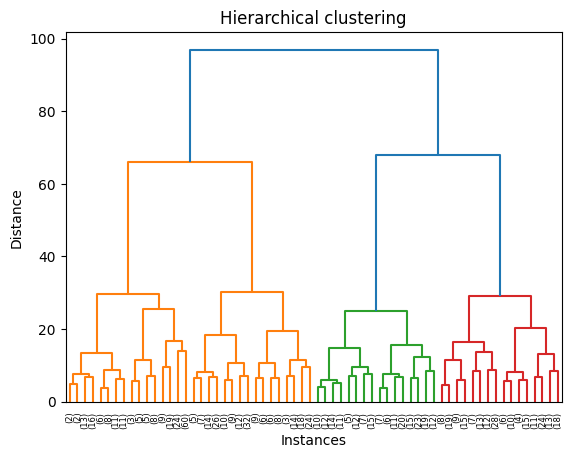

In [39]:
# Agglomerative clustering model with distance threshold for dendrogram
clustering_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
clustering_model = clustering_model.fit(X)
# Plot dendrogram to find the optimal number of clusters (Note: not all points are plotted; increase p in order to plot more points)
plot_dendrogram(clustering_model, truncate_mode='level', p=5)

If we consider the distance between possible groupings, we would place the dividing line (commonly called *K*) slightly below 40, which would leave us with 4 clusters and *K*\$=4\$. In this case, we choose K=4 because the largest distance occurs between \$K = 3\$ and \$K = 4\$.


In [40]:
# Save the agglomerative algorithm with 4 clusters
optimal_clusters = 4
agnes_clustering_model = AgglomerativeClustering(n_clusters=optimal_clusters,
                                                 linkage='ward')
cluster_agnes_labels = agnes_clustering_model.fit_predict(X)

# Add the labels
X['cluster_agnes'] = cluster_agnes_labels
print(X.head())

    tempMode  AQ  USS  CS  VOC  IP  Temperature   sqrt_RP  log_footfall  \
49         1   3    4   5    2   6          0.0  0.063993      0.000000   
50         7   5    1   6    5   3          0.0  0.750375      0.000000   
51         2   5    2   6    5   3          0.0  0.348522      0.000000   
52         7   4    3   6    3   2          0.0  0.762037      0.396409   
54         7   2    4   6    0   4          0.0  0.969393      0.430389   

    Cluster_DBSCAN  cluster_agnes  
49               1              0  
50               0              3  
51               0              2  
52               1              1  
54               1              1  


## Analysis

#### Perform a detailed analysis of each of the groups generated by the previously applied algorithms and decide which is the best method for the dataset.
Use charts or tables to support your conclusions.


We start by showing the most commonly used coefficient, that is, the silhouette coefficient.

In [41]:
# For each model
silhouette_kmeans = silhouette_score(X, kmeans_best.labels_)
silhouette_dbscan = silhouette_score(X, dbscan_best.fit_predict(X))
silhouette_agglo = silhouette_score(X, cluster_agnes_labels)

print(f"Silhouette Score - KMeans: {silhouette_kmeans:.4f}")
print(f"Silhouette Score - DBSCAN: {silhouette_dbscan:.4f}")
print(f"Silhouette Score - Agglomerative: {silhouette_agglo:.4f}")


Silhouette Score - KMeans: 0.3187
Silhouette Score - DBSCAN: 0.2225
Silhouette Score - Agglomerative: 0.3086


The silhouette coefficient leaves us with KMeans and Hierarchical Clustering models tied, with a slightly better result for the former, leaving DBSCAN far behind.

We now create a DataFrame to include comparisons between algorithms and the results of different coefficients:


In [42]:
comparison_df = pd.DataFrame({
    'Algorithm': ['K-means', 'DBSCAN', 'Agglomerative'],
    'Silhouette': [silhouette_kmeans, silhouette_dbscan, silhouette_agglo],
    'Calinski-Harabasz': [
        calinski_harabasz_score(X, kmeans_best.labels_),
        calinski_harabasz_score(X, dbscan_best.fit_predict(X)),
        calinski_harabasz_score(X, AgglomerativeClustering(n_clusters=optimal_k).fit_predict(X))
    ]
})

In [43]:
print(comparison_df)

       Algorithm  Silhouette  Calinski-Harabasz
0        K-means    0.318680         411.913601
1         DBSCAN    0.222475         208.135716
2  Agglomerative    0.308639         395.746181


For the Calinski-Harabasz coefficient, which measures the separation between clusters and their compactness, we obtain results similar to the silhouette coefficient.

We now proceed to check, by reducing the data dimensionality to two variables using PCA, how the clusters are distributed.

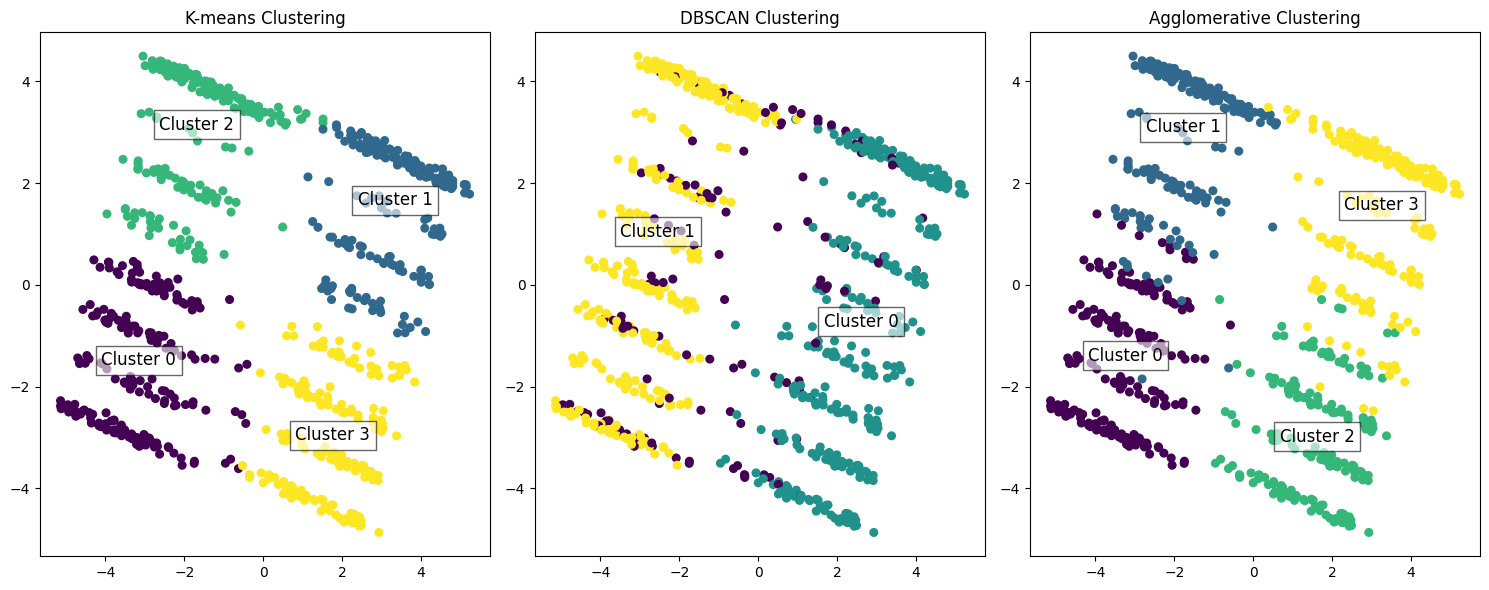

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Function to add the labels to the clusters
def etiquetar_clusteres(ax, X_pca, labels):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label == -1:
            continue  # Omit outliers in DBSCAN
        cluster_points = X_pca[labels == label]
        centroide = cluster_points.mean(axis=0)
        ax.text(centroide[0], centroide[1], f'Cluster {label}', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.6), ha='center')

# K-means
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_best.labels_, cmap='viridis', s=30)
axes[0].set_title('K-means Clustering')
etiquetar_clusteres(axes[0], X_pca, kmeans_best.labels_)

# DBSCAN
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='viridis', s=30)
axes[1].set_title('DBSCAN Clustering')
etiquetar_clusteres(axes[1], X_pca, labels_dbscan)

# Agglomerative
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_agnes_labels, cmap='viridis', s=30)
axes[2].set_title('Agglomerative Clustering')
etiquetar_clusteres(axes[2], X_pca, cluster_agnes_labels)

plt.tight_layout()
plt.show()


In general terms, the DBSCAN algorithm is only able to detect two clusters, leaving many points outside them as outliers. For the K-Means algorithm, we found an optimal number of four clusters; the same applies to the Agglomerative Clustering algorithm, which also results in four clusters after examining the dendrogram. These two algorithms yield similar results, but we observe differences in the assignment of individual observations. In particular, K-Means seems to produce more compact clusters, as previously indicated by the superior silhouette and Calinski-Harabasz scores.

Given this, we chose K-Means as the best algorithm due to its better performance in separating clusters compared to Agglomerative Clustering. The cluster structure appears more stable with K-Means, and the metrics support this, providing a solid basis for identifying distinct patterns that could correspond to imminent failures.
